In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sb

['Suicides in India 2001-2012.csv']


In [68]:
df=pd.read_csv("../input/Suicides in India 2001-2012.csv")
df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
98443,Jammu & Kashmir,2007,Professional_Profile,Service (Private),Female,15-29,1
221341,Uttar Pradesh,2008,Causes,Physical Abuse (Rape/Incest Etc.),Male,45-59,0
150533,Meghalaya,2004,Causes,Love Affairs,Female,45-59,0
100787,Jammu & Kashmir,2011,Social_Status,Widowed/Widower,Female,0-100+,5
4951,A & N Islands,2009,Professional_Profile,Public Sector Undertaking,Male,15-29,0
185868,Punjab,2007,Causes,Divorce,Male,15-29,0
174713,Odisha,2011,Causes,Cancellation/Non-Settlement of Marriage,Male,45-59,7
180248,Puducherry,2009,Causes,Death of Dear Person,Female,30-44,2
166403,Nagaland,2008,Means_adopted,By Self Infliction of injury,Male,15-29,0
93618,Himachal Pradesh,2011,Causes,Physical Abuse (Rape/Incest Etc.),Male,30-44,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [70]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

In [71]:
df.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

### generic function for plotting bars

In [119]:
def plotbar(df,column,vertical):
    count=[]
    for x in df[column].unique():
        c=df[df[column]==x].Total.sum()
        count.append(c)
    
    plt.figure(figsize=(10,10))
    plt.bar(df[column].unique(),count)
    if(vertical):
        plt.xticks(range(df[column].nunique()),rotation='vertical')
    plt.show()

In [120]:
df_suicides=df[df.Type_code=='Causes'] # data may overlap with other type codes, so selected just one type code
df_suicides.head(2)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0


## finding out suicide count from 2001 to 2012

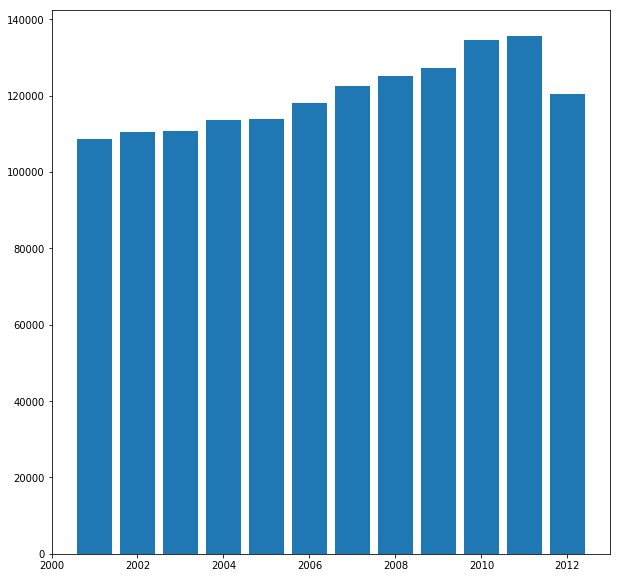

In [121]:
plotbar(df_suicides,"Year",False)

Moslty suicides are increasing per year with an exception of last year(2012)

## suicide count by states

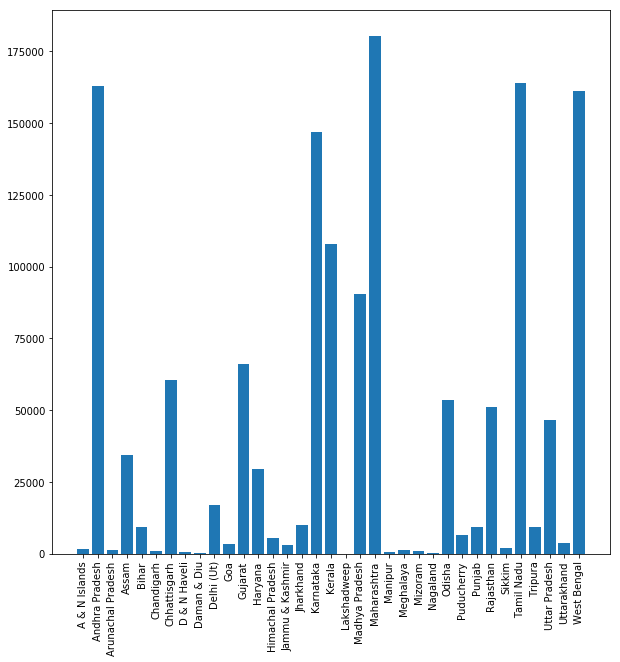

In [124]:
plotbar(df_suicides,"State",True)

South indian states like - Andhra Pradesh, Karnataka, Tamil Nadu, Maharashtra have alarmingly high suicide rates.

States in the west of India (West Bengal and Gujrat) also have very high suicidal rates.

These states are ones with most industrial and technological development. Does this technological development have something to
do with loneliness and suicidal rates

## suicide count by gender

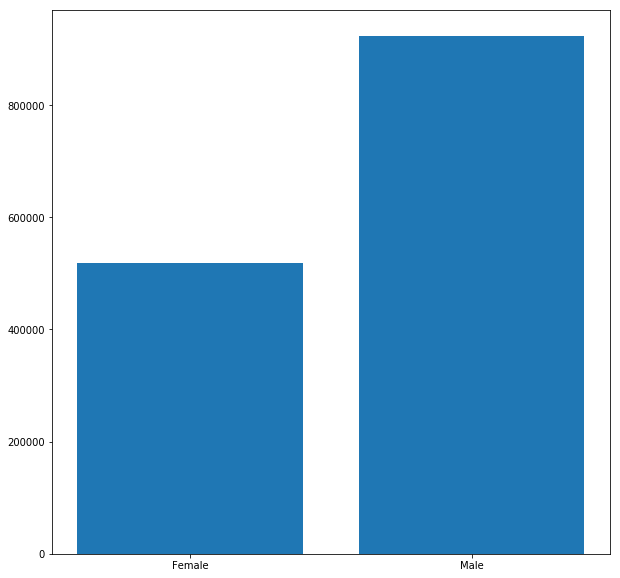

In [126]:
plotbar(df_suicides,"Gender",False)

Males are having high suicidal rates. This might be becuase Indian males are burdened with more pressure.

Comparatively Females also have alarming suicidal rates, considering the sex ratio of India. This maybe because females are too
contricted and dominated in India. It will be interesting to explore whether housewives are having high suicidal rates or working women.

## count by Age

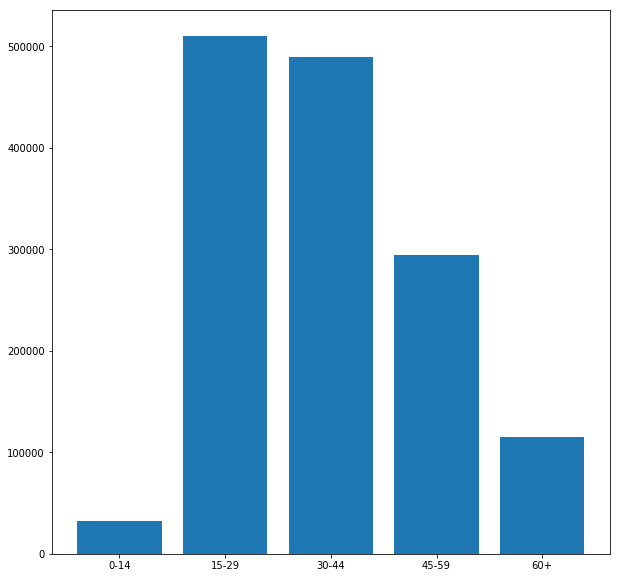

In [130]:
plotbar(df_suicides,"Age_group",False)

Not very surprising, age group 15-45 have highest suicidal rates. 

### generic function to make bars of all type of type_codes

In [85]:
def makebar(df):
    count=[]
    for means in df.Type.unique():
        c=df[df.Type==means].Total.sum()
        count.append(c)
    
    plt.figure(figsize=(10,10))
    plt.bar(df.Type.unique(),count)
    plt.xticks(range(df.Type.nunique()),rotation='vertical')
    plt.show()

## frequency of means adopted for suicides

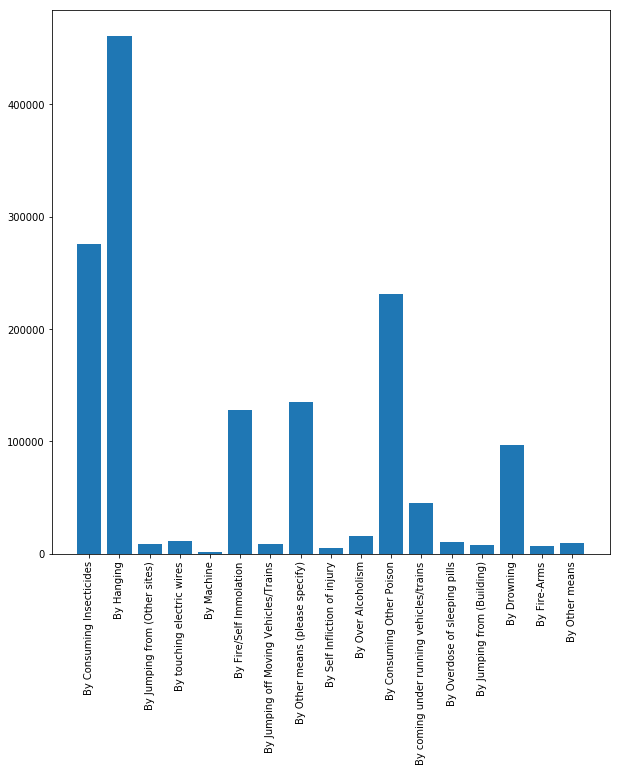

In [76]:
df_means=df[df.Type_code=='Means_adopted']
makebar(df_means)

Most of the suicides are done by `hanging` and `consuming poison/insecticide`.

### frequency of causes

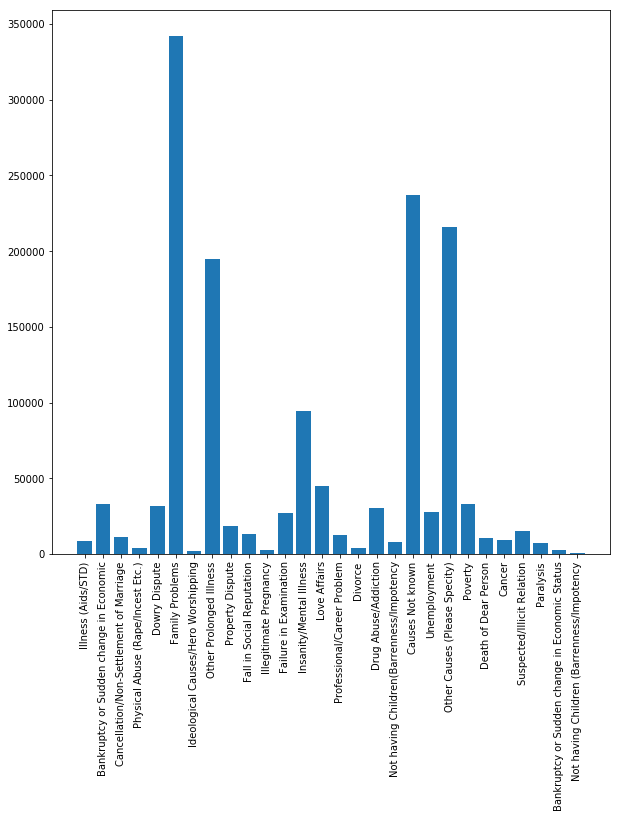

In [77]:
df_causes=df[df.Type_code=='Causes']
makebar(df_causes)

Family problems, prolonged/mental illness are the most probable cause for suicide

### what are their education status

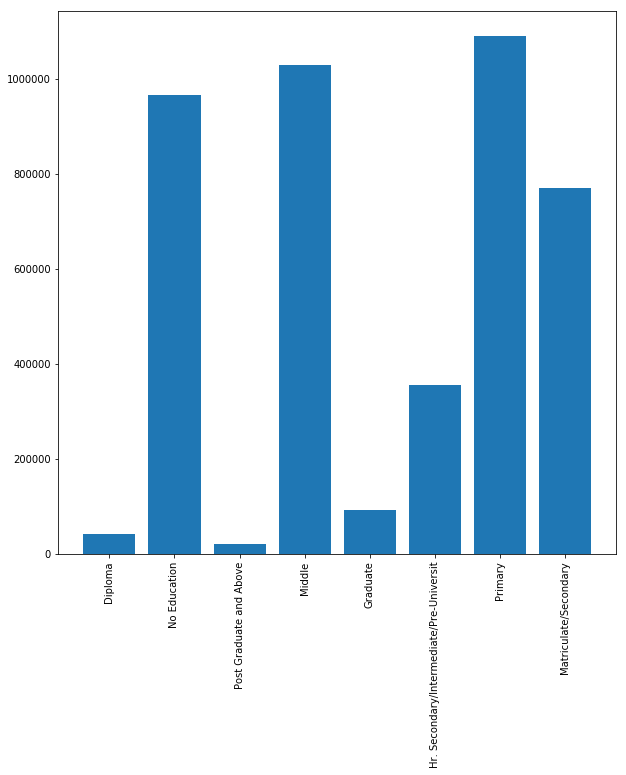

In [78]:
df_education=df[df.Type_code=='Education_Status']
makebar(df_education)

People with no education or very less education tends to do much more suicides than graduated and well educated

### what are their professional profile

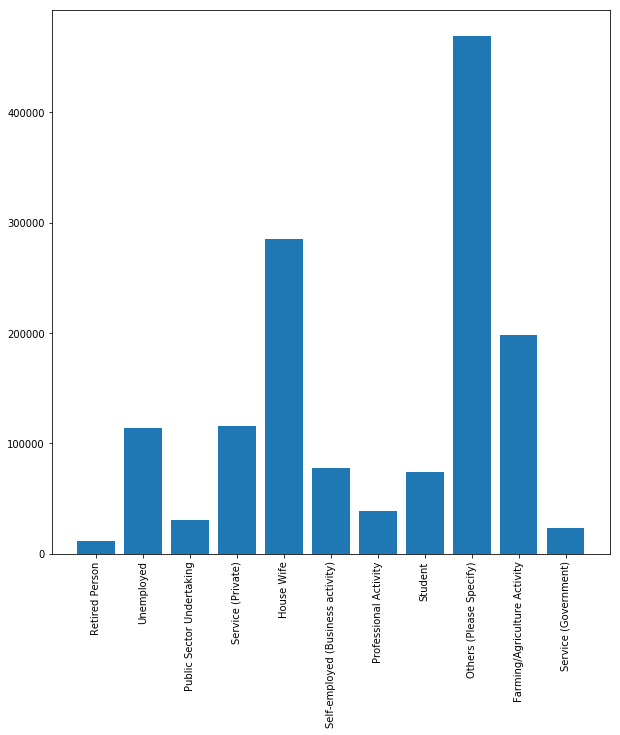

In [79]:
df_profession=df[df.Type_code=='Professional_Profile']
makebar(df_profession)

People with serivce in Goverment Sector, Public Sector or doing some Professional Activity tends to have much lower suicide 
rates. House Wife are having very high suicide case.

### what are their social status

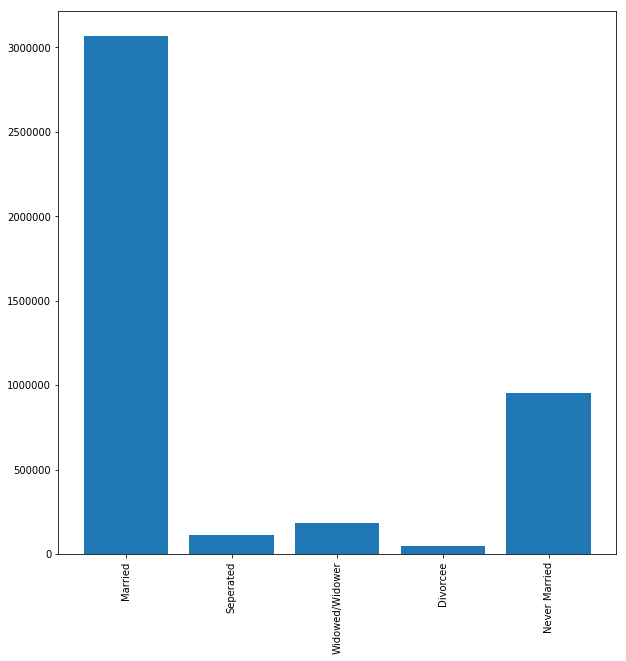

In [80]:
df_social=df[df.Type_code=='Social_Status']
makebar(df_social)

Surprisingly married people tends to have very high suicide rate, never married being the second.